# EDA Assignment

---

**EDA Project Instructions**

1. **Read Each Task Carefully**: Understand each task’s requirements before starting your analysis.

2. **Perform the Analysis**: For each task, you’ll find a description in the code cell. Write your code directly in the provided cells to perform the necessary analysis using the Heart Attack dataset.

3. **Visualize and Interpret**: Create visualizations and interpret the results as needed. Ensure your analysis addresses the specific questions and insights required.

4. **Complete All Tasks**: Make sure you address each task. Each task is designed to test different aspects of data analysis and visualization.

5. **Download Your Notebook**: After completing and reviewing your analysis, download your notebook file (.ipynb) by selecting `File > Download > Download .ipynb`.

6. **Submit Your Work**: Upload the downloaded `.ipynb` file to the designated platform for submission.

7. **Verify Your Submission**: Ensure that you have submitted the correct file and that it is not corrupted. If needed, resubmit the file.

Good luck, and happy analyzing!

---

## Dataset Information :
<ul style= "color:#137667;
            font-size:12px;">
    <li> age : age of the patient</li>
    <li> sex : sex of the patient (0 - Male, 1 - Female)</li>
    <li> cp : Chest Pain type</li>
    0: typical angina <br>
    1: atypical angina <br>
    2: non-anginal pain <br>
    3: asymptomatic <br>
    <li> trtbps : resting blood pressure (in mm Hg)</li>
    <li> fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li> chol : cholestoral in mg/dl fetched via BMI sensor</li>
    <li> rest_ecg : resting electrocardiographic results</li>
  0:normal <br>
  1:having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of>0.05 mV) <br>
  2:showing probable or definite left ventricular hypertrophy by Estes' criteria
    <li> thalachh : maximum heart rate achieved</li>
    <li> exng : exercise induced angina (1 = yes; 0 = no)</li>
    <li> oldpeak : Previous peak</li>
    <li> slp : ST/HR Slope </li>
    <li> caa : number of major vessels (0-4)</li>
    <li> thall : Thal rate</li>
    <li> output : 0= less chance of heart attack 1= more chance of heart attack</li>
</ul>

In [1]:
# Run this code cell for initial setup
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load the data to colab
data = pd.read_csv('heart.csv')
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0.0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0.0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0.0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1.0,0.6,2,0,2,1
5,57,1,0,140,192.0,0,1,148.0,0.0,0.4,1,0,1,1
6,56,0,1,140,294.0,0,0,153.0,0.0,1.3,1,0,2,1
7,44,1,1,120,263.0,0,1,173.0,0.0,0.0,2,0,3,1
8,52,1,2,172,199.0,1,1,162.0,0.0,0.5,2,0,3,1
9,57,1,2,150,168.0,0,1,174.0,0.0,1.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       324 non-null    int64  
 1   sex       324 non-null    int64  
 2   cp        324 non-null    int64  
 3   trtbps    324 non-null    int64  
 4   chol      321 non-null    float64
 5   fbs       324 non-null    int64  
 6   restecg   324 non-null    int64  
 7   thalachh  320 non-null    float64
 8   exng      321 non-null    float64
 9   oldpeak   324 non-null    float64
 10  slp       324 non-null    int64  
 11  caa       324 non-null    int64  
 12  thall     324 non-null    int64  
 13  output    324 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.6 KB


---
---
**1. Check the presence of duplicate values and deal with them.**

In [5]:
# write your code here
data.duplicated().sum()

np.int64(22)

---
---
**2.Check the presence of missing values and deal with them.**

In [7]:
# write your code here
# chol column (continuous numerical)
# thalachh (continuous numerical)
# exng (categorical)
data.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,3
fbs,0
restecg,0
thalachh,4
exng,3
oldpeak,0


In [9]:
data['chol'].fillna(data['chol'].mean(), inplace=True)

data['thalachh'].fillna(data['thalachh'].median(), inplace=True)

data['exng'].fillna(data['exng'].mode()[0], inplace=True)

In [10]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


---
---
**3.Determine mean, standard deviation and quartiles(q1,q2,q3) for following columns:**
   - age
   - trtbps
   - chol
   - thalachh

In [12]:
# write your code here
age_mean = data['age'].mean()
age_std = data['age'].std()
age_q1 = data['age'].quantile(0.25)
age_q2 = data['age'].quantile(0.50)
age_q3 = data['age'].quantile(0.75)

trtbps_mean = data['trtbps'].mean()
trtbps_std = data['trtbps'].std()
trtbps_q1 = data['trtbps'].quantile(0.25)
trtbps_q2 = data['trtbps'].quantile(0.50)
trtbps_q3 = data['trtbps'].quantile(0.75)

chol_mean = data['chol'].mean()
chol_std = data['chol'].std()
chol_q1 = data['chol'].quantile(0.25)
chol_q2 = data['chol'].quantile(0.50)
chol_q3 = data['chol'].quantile(0.75)

thalachh_mean = data['thalachh'].mean()
thalachh_std = data['thalachh'].std()
thalachh_q1 = data['thalachh'].quantile(0.25)
thalachh_q2 = data['thalachh'].quantile(0.50)
thalachh_q3 = data['thalachh'].quantile(0.75)


---
---
**4.Analyse whether males or females are at a higher risk of heart attack.**

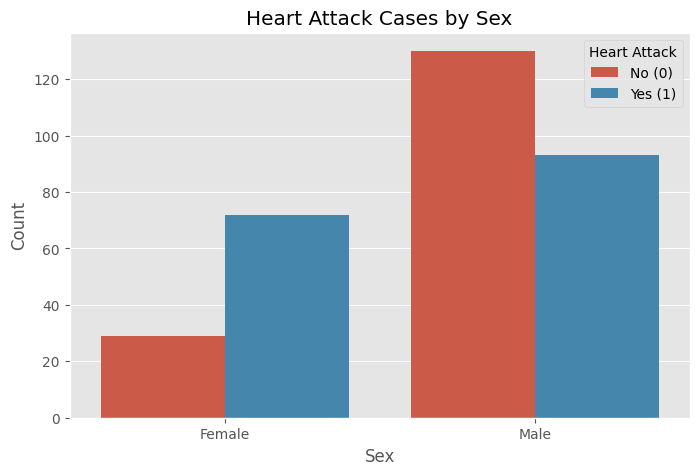

In [21]:
# write your code here
# Calculate proportion of heart attacks by sex
plt.figure(figsize=(8,5))
sns.countplot(x='sex', hue='output', data=data)
plt.xticks([0,1], ['Female', 'Male'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Heart Attack Cases by Sex')
plt.legend(title='Heart Attack', labels=['No (0)', 'Yes (1)'])
plt.show()


**5.Patients with which type of chest pain are at highest risk of heart attack.**

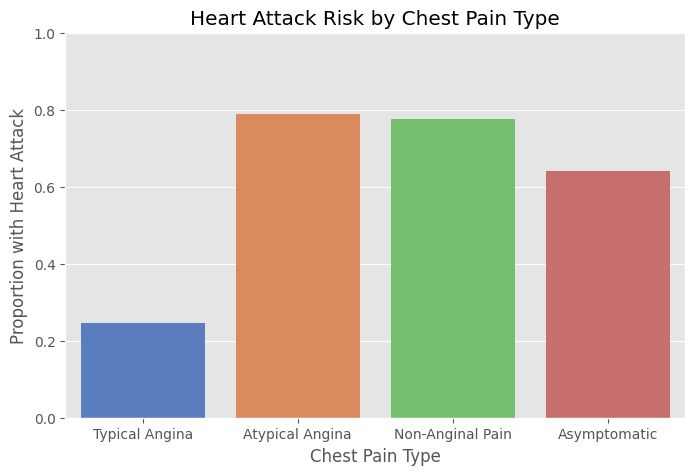

In [25]:
cp_risk = data.groupby('cp')['output'].mean().reset_index()


cp_labels = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-Anginal Pain',
    3: 'Asymptomatic'
}
cp_risk['cp_label'] = cp_risk['cp'].map(cp_labels)


# Plot the proportions
plt.figure(figsize=(8,5))
sns.barplot(x='cp_label', y='output', data=cp_risk, palette='muted')

plt.xlabel('Chest Pain Type')
plt.ylabel('Proportion with Heart Attack')
plt.title('Heart Attack Risk by Chest Pain Type')
plt.ylim(0, 1)

plt.show()

---
---
**6.Analyse the effect of age on heart attack risk.**

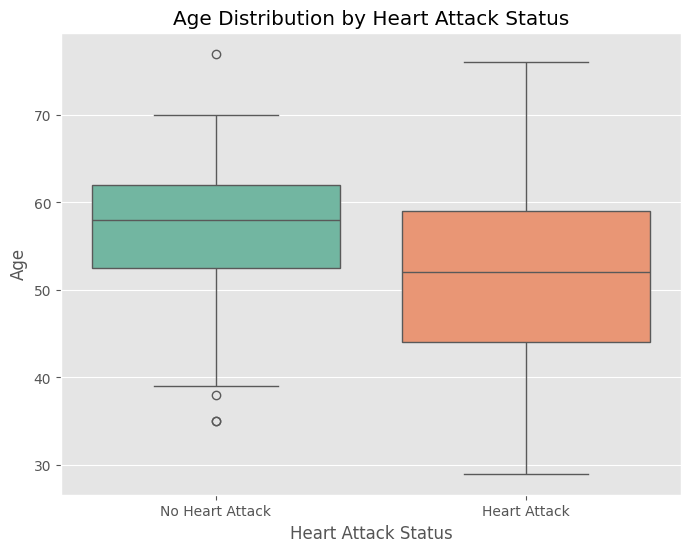

In [29]:
# write your code here
plt.figure(figsize=(8,6))
sns.boxplot(x='output', y='age', data=data, palette='Set2')

plt.xticks([0,1], ['No Heart Attack', 'Heart Attack'])
plt.xlabel('Heart Attack Status')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Attack')

plt.show()


---
---
**7.A higher risk of heart attack is associated more with low fasting blood sugar levels or high fasting blood sugar levels.**

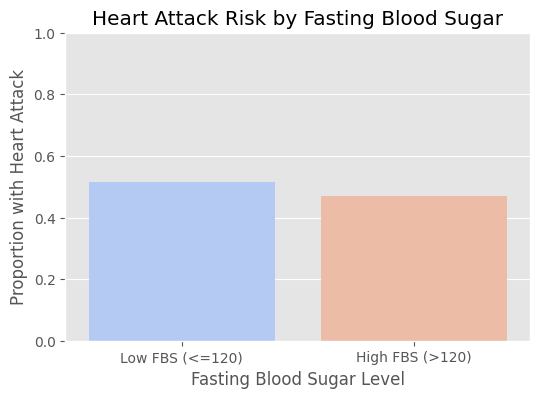

In [33]:
fbs_risk = data.groupby('fbs')['output'].mean().reset_index()
fbs_risk['fbs_label'] = fbs_risk['fbs'].map({0: 'Low FBS (<=120)', 1: 'High FBS (>120)'})
plt.figure(figsize=(6,4))
sns.barplot(x='fbs_label', y='output', data=fbs_risk, palette='coolwarm')
plt.ylabel('Proportion with Heart Attack')
plt.xlabel('Fasting Blood Sugar Level')
plt.title('Heart Attack Risk by Fasting Blood Sugar')
plt.ylim(0,1)

plt.show()

---
---
**8.How the risk of heart atack can be determined from resting electrocardiographic results?**

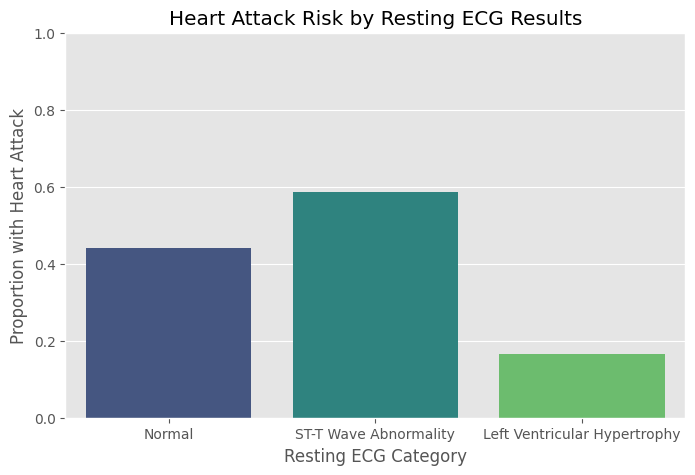

In [35]:
restecg_risk = data.groupby('restecg')['output'].mean().reset_index()
restecg_labels = {
    0: 'Normal',
    1: 'ST-T Wave Abnormality',
    2: 'Left Ventricular Hypertrophy'
}
restecg_risk['restecg_label'] = restecg_risk['restecg'].map(restecg_labels)
plt.figure(figsize=(8,5))
sns.barplot(x='restecg_label', y='output', data=restecg_risk, palette='viridis')
plt.title('Heart Attack Risk by Resting ECG Results')
plt.xlabel('Resting ECG Category')
plt.ylabel('Proportion with Heart Attack')
plt.ylim(0,1)

plt.show()

---
---
**9. Is resting blood presure a significant factor for detrmining risk of a heart attack?**

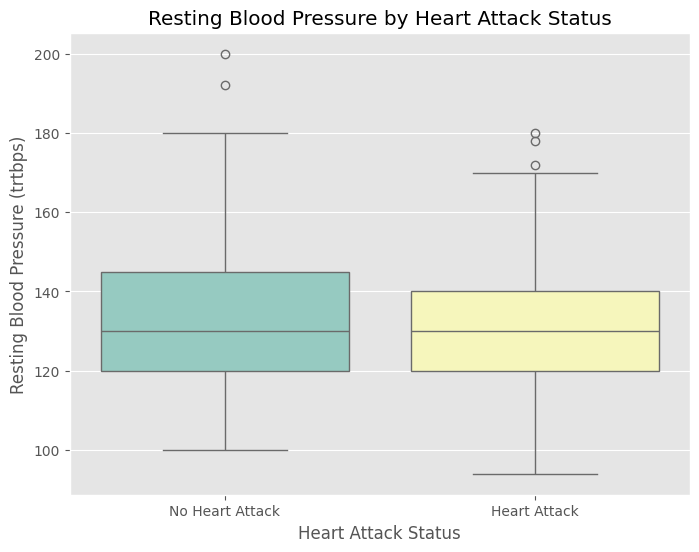

In [37]:
# write your code here
plt.figure(figsize=(8,6))
sns.boxplot(x='output', y='trtbps', data=data, palette='Set3')

plt.xticks([0,1], ['No Heart Attack', 'Heart Attack'])
plt.xlabel('Heart Attack Status')
plt.ylabel('Resting Blood Pressure (trtbps)')
plt.title('Resting Blood Pressure by Heart Attack Status')
plt.show()

---
---
**10.Is heart attack risk asociated with a higher heart rate?**

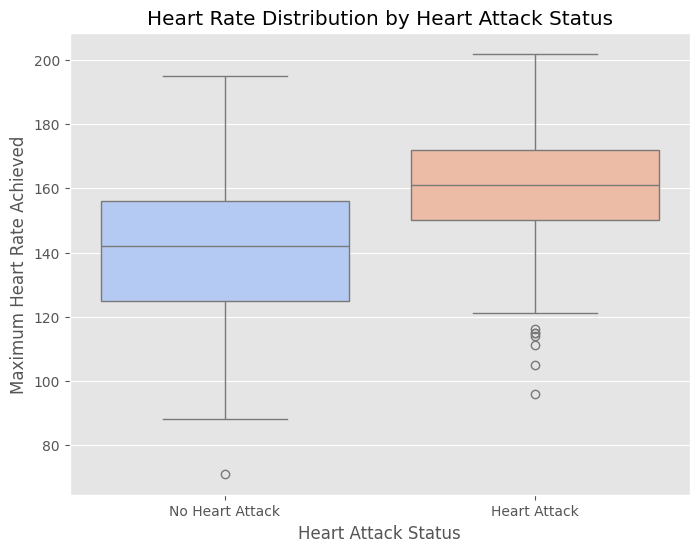

In [38]:
# write your code here
plt.figure(figsize=(8,6))
sns.boxplot(x='output', y='thalachh', data=data, palette='coolwarm')

plt.xticks([0,1], ['No Heart Attack', 'Heart Attack'])
plt.xlabel('Heart Attack Status')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Heart Rate Distribution by Heart Attack Status')
plt.show()

---
---
**11. Determine whether ST/HR (ST segment and Heart rate ratio) is a singificant factor in determining heart attack risk.**

In [39]:
data['st_hr_ratio'] = data['oldpeak'] / data['thalachh']

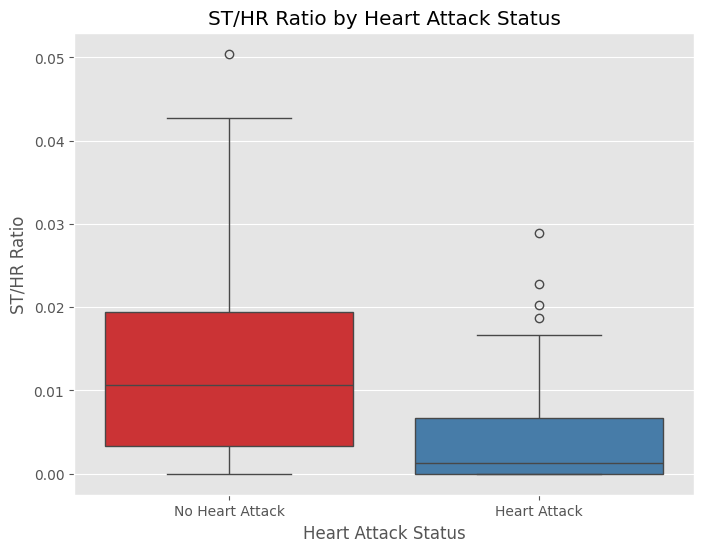

In [40]:
# write your code here
plt.figure(figsize=(8,6))
sns.boxplot(x='output', y='st_hr_ratio', data=data, palette='Set1')

plt.xticks([0,1], ['No Heart Attack', 'Heart Attack'])
plt.xlabel('Heart Attack Status')
plt.ylabel('ST/HR Ratio')
plt.title('ST/HR Ratio by Heart Attack Status')
plt.show()


## End!